<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Machine Learning Methods: Naïve Bayes</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---



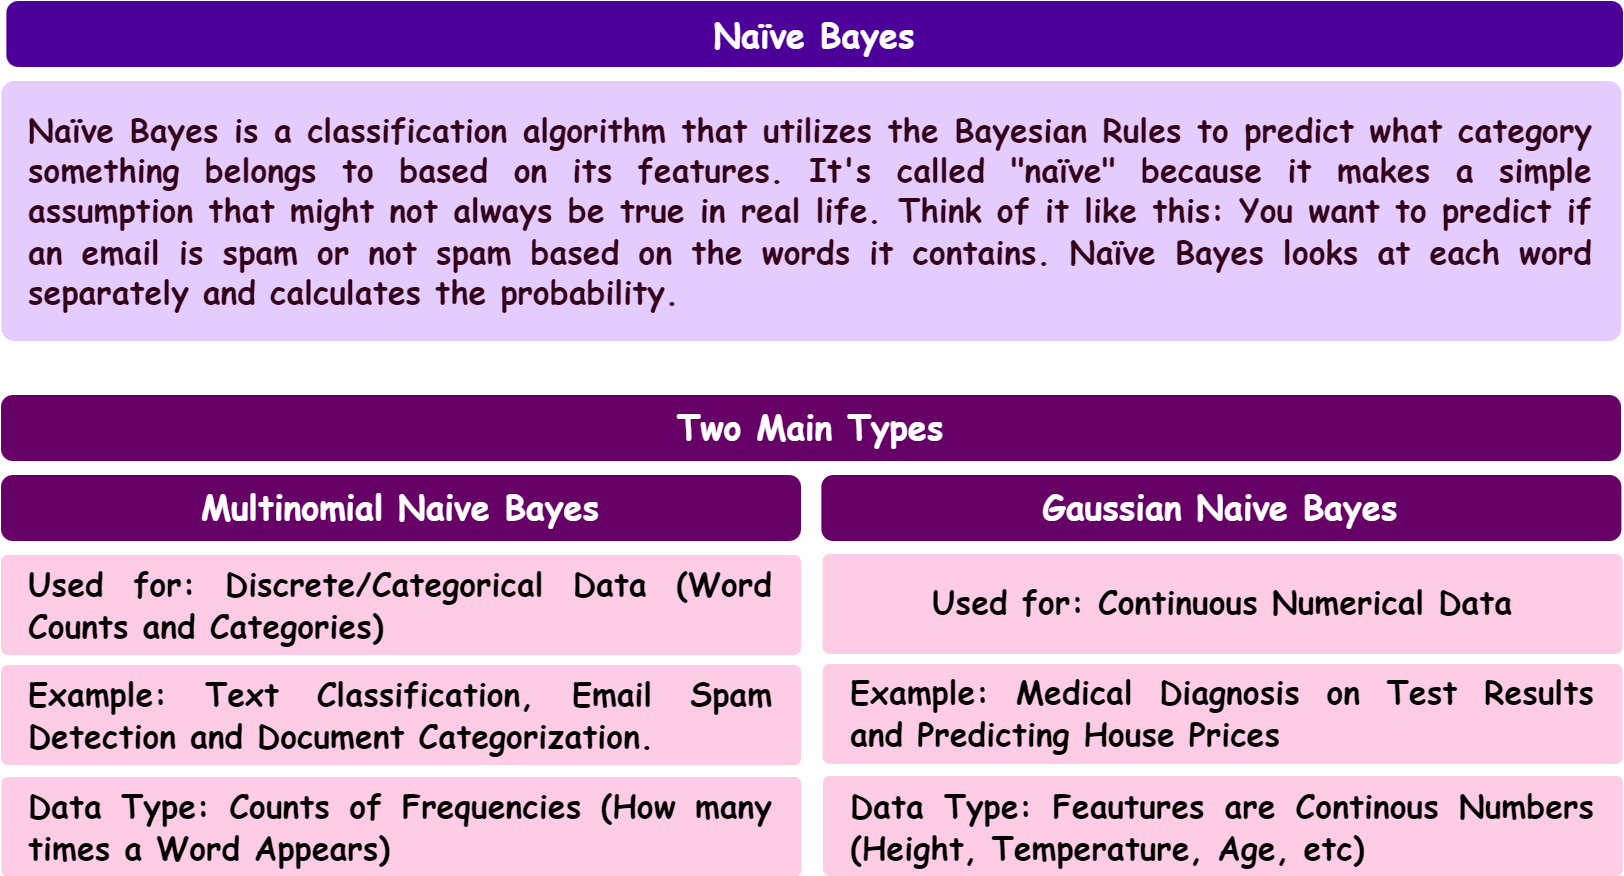



---

### **Gaussian Naive Bayes**

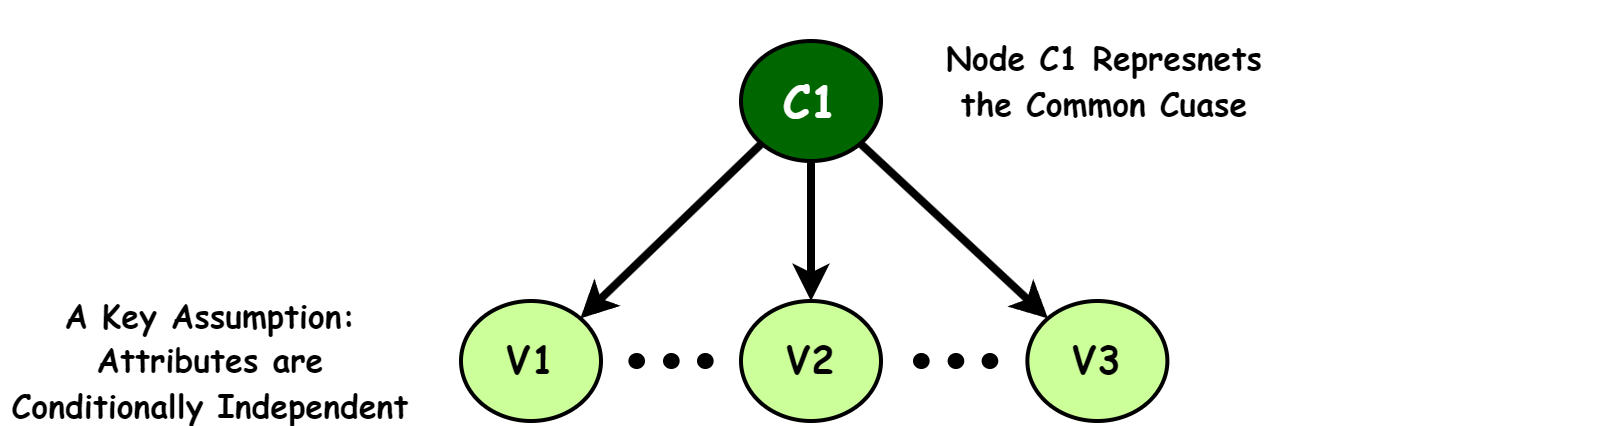

- **C** = The class/category we want to predict (like "spam" or "not spam")
- **V₁, V₂, V₃...** = The features/attributes we use to make the prediction (like specific words in an email)

#### **The "Naïve" Assumption**
**The algorithm assumes each feature is independent** - meaning the presence of one word doesn't affect the probability of another word appearing. This is often not true in real life (some words commonly appear together), but it works surprisingly well in practice.

#### **The Two Types of Parameters**

**Type 1: Class Probabilities**
- **P(C)** = Prior probability of each class
- How often each class appears in the training data
- Example: 60% of emails are "not spam", 40% are "spam"

**Type 2: Feature Probabilities** 
- **P(V|C)** = Likelihood of each feature given a class
- How often each feature appears within each class
- Example: Word "free" appears in 80% of spam emails, 10% of normal emails

#### **How It Works**

**Training Phase (Learning)**
1. Count how many times each class appears in your training data
2. For each class, count how often each feature appears
3. Calculate probabilities from these counts

**Prediction Phase**
1. Take a new item with unknown class
2. For each possible class, calculate: **P(class) × P(feature1|class) × P(feature2|class) × ...**
3. Pick the class with the highest probability


#### **Mathematical Formula**

**Bayes Rule (The Foundation)**
$$P(C_i = c|v_1, ..., v_m) = \frac{P(v_1, ..., v_m|C_i = c)P(C_i = c)}{P(v_1, ..., v_m)}$$

**In simple terms:** Probability of class C given features = (Probability of features given class × Probability of class) / Probability of features

**Naïve Bayes Assumption (Independence)**
$$P(C_i = c|v_1, ..., v_m) = \alpha \prod_{k=1}^{m} P(v_k|C_i = c)P(C_i = c)$$

**In simple terms:** We can multiply individual feature probabilities together (α is just a normalizing constant)

**Prediction Formula**
$$C^* = \text{argmax}_c P(c | v_1, ..., v_m)$$

**In simple terms:** Pick the class c that gives the highest probability

####  **Learning the Parameters**

**Two Approaches:**
1. **Elicitation** - Ask domain experts to provide probability estimates
2. **Machine Learning** - Use training data to calculate probabilities empirically (more common)

####  **Terminologies**

| Term | Symbol | Definition | Example |
|------|--------|------------|---------|
| **Bayes Rule** | - | Mathematical foundation using probability theory | Core formula for calculating class probabilities |
| **Conditional Independence** | - | The "naïve" assumption that features don't affect each other | Assumes "free" and "money" in email are independent |
| **Prior Probability** | P(C) | How common each class is in training data | 60% emails are "not spam", 40% are "spam" |
| **Likelihood** | P(V\|C) | How likely each feature is within each class | "Free" appears in 80% of spam, 10% of normal emails |
| **Posterior Probability** | P(C\|V) | Final probability of class given the features | Probability email is spam given it contains "free" |
| **Conditional Probability Tables (CPTs)** | - | Tables storing P(C) and P(V\|C) values | Lookup tables with all learned probabilities |


---

### **Maximum Likelihood Estimator in Naive Bayes**

**MLE** is a method to learn the parameters (probabilities) needed for Naïve Bayes from training data. Instead of guessing probabilities, we count occurrences in our data and calculate them mathematically. MLE provides a systematic way to learn all the probabilities Naïve Bayes needs from training data. By counting and dividing, we can estimate how likely each feature is to appear in each class, then use these estimates to classify new examples.

**Formula:**
$$P_{MLE}(var = w_a) = \frac{count(var = w_a)}{\# \text{ of samples}}$$

**In simple terms:** Probability = (How many times we see this value) ÷ (Total number of examples)

**The MLE Process**
1. **Count occurrences** of each feature value within each class
2. **Divide by total examples** in that class to get probabilities
3. **Multiply probabilities** together for prediction
4. **Choose the class** with the highest result

#### **Basic Example: Color and Shape**

Suppose we have 4 training examples with two features: **Shape** (Circle/Square) and **Color** (Red/Blue/Green):

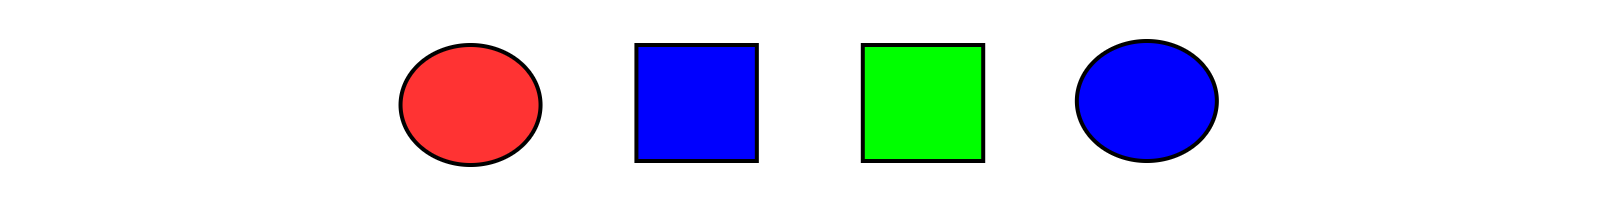

**Calculating probabilities:**
- P(Circle) = 2/4 = 0.5 (2 circles out of 4 examples)
- P(Square) = 2/4 = 0.5 (2 squares out of 4 examples)
- P(Blue|Square) = 2/2 = 1.0 (both squares are blue)
- P(Red|Circle) = 1/2 = 0.5 (1 red circle out of 2 circles)

<br>

### **Worked Example: Movie Recommendation System**

Let's predict whether someone will **"Like"** or **"Dislike"** a movie based on three features:

| Day | Genre | Duration | Rating | Recommendation |
|-----|-------|----------|--------|----------------|
| D1 | Action | Long | PG-13 | Dislike |
| D2 | Action | Long | R | Dislike |
| D3 | Comedy | Long | PG-13 | Like |
| D4 | Drama | Short | PG-13 | Like |
| D5 | Drama | Medium | PG | Like |
| D6 | Drama | Medium | R | Dislike |
| D7 | Comedy | Medium | PG | Like |
| D8 | Action | Short | PG-13 | Dislike |
| D9 | Action | Medium | PG | Like |
| D10 | Drama | Short | PG | Like |
| D11 | Action | Short | R | Like |
| D12 | Comedy | Short | R | Like |
| D13 | Comedy | Long | PG | Like |
| D14 | Drama | Short | R | Dislike |

#### Step 1: Calculate Class Probabilities

Count the outcomes:
- **Like**: 9 out of 14 examples
- **Dislike**: 5 out of 14 examples

$$P(Like) = \frac{9}{14} = 0.64$$
$$P(Dislike) = \frac{5}{14} = 0.36$$

#### Step 2: Calculate Feature Probabilities

For each feature, count how often each value appears within each class:

**Genre probabilities:**
- P(Action|Like) = 3/9 = 0.33
- P(Comedy|Like) = 4/9 = 0.44
- P(Drama|Like) = 2/9 = 0.22
- P(Action|Dislike) = 3/5 = 0.60
- P(Comedy|Dislike) = 0/5 = 0.00
- P(Drama|Dislike) = 2/5 = 0.40

**Duration probabilities:**
- P(Short|Like) = 5/9 = 0.56
- P(Medium|Like) = 3/9 = 0.33
- P(Long|Like) = 1/9 = 0.11
- P(Short|Dislike) = 1/5 = 0.20
- P(Medium|Dislike) = 1/5 = 0.20
- P(Long|Dislike) = 3/5 = 0.60

**Rating probabilities:**
- P(PG|Like) = 4/9 = 0.44
- P(PG-13|Like) = 3/9 = 0.33
- P(R|Like) = 2/9 = 0.22
- P(PG|Dislike) = 0/5 = 0.00
- P(PG-13|Dislike) = 3/5 = 0.60
- P(R|Dislike) = 2/5 = 0.40

#### Step 3: Make a Prediction

**New movie:** Action, Short, PG-13
**Question:** Will the user Like or Dislike this movie?

**Calculate probability for "Like":**
$$P(Like|Action, Short, PG-13) = \alpha \times P(Action|Like) \times P(Short|Like) \times P(PG-13|Like) \times P(Like)$$
$$= \alpha \times 0.33 \times 0.56 \times 0.33 \times 0.64 = \alpha \times 0.039$$

**Calculate probability for "Dislike":**
$$P(Dislike|Action, Short, PG-13) = \alpha \times P(Action|Dislike) \times P(Short|Dislike) \times P(PG-13|Dislike) \times P(Dislike)$$
$$= \alpha \times 0.60 \times 0.20 \times 0.60 \times 0.36 = \alpha \times 0.026$$

#### Step 4: Choose the Winner

Since 0.039 > 0.026, we predict **"Like"**


---

### **Expected Likelihood Estimator in Naive Bayes**

**The Sparse Data Problem** occurs when certain feature values don't appear in our training data for specific classes. This creates two major issues, **Issue 1 is the Zero Probability Problem** where if a feature value never appears with a particular class, MLE gives it probability = 0. This causes the entire prediction to become 0 (since we multiply probabilities together). **Issue 2 is the Undefined Probability Problem** where if a feature value doesn't appear anywhere in the training data, we can't calculate its probability at all (division by zero).

Imagine we're classifying customer reviews as **Positive** or **Negative** based on words they contain:

| Review | Words | Classification |
|--------|-------|----------------|
| R1 | "amazing", "love" | Positive |
| R2 | "terrible", "hate" | Negative |
| R3 | "good", "like" | Positive |
| R4 | "bad", "dislike" | Negative |

**Problem:** What happens if we encounter a new review with the word "excellent" that never appeared in our training data?

**Maximum Likehood Estimator (MLE) Result:** $P("excellent"|Positive) = 0/2 = 0$

This means any review containing "excellent" would get probability 0 for being Positive, even though "excellent" is clearly a positive word. The solution is to use a **Expected Likelihood Estimation (ELE)** which solves this by adding a small constant (ε, epsilon) to all counts. This is called **smoothing**.

<br>

### **Expected Likelihood Estimator Formula:**

$$P_{ELE}(feature = value|class) = \frac{count(value|class) + \varepsilon}{\sum_{i} (count(value_i|class) + \varepsilon)} = \frac{count(value|class) + \varepsilon}{total\_examples\_in\_class + m \times \varepsilon}$$

Where:
- $ε$ (epsilon) = smoothing constant (usually 1)
- $m$ = number of possible values the feature can take

**Special Case: Completely Unseen Features**
If a feature value doesn't exist anywhere in the dataset:
$$P_{ELE}(unseen\_feature) = \frac{1}{m}$$

<br>

### **Example: Game Preference Prediction**

Predict if someone will **"Enjoy"** or **"Not Enjoy"** a video game based on **Genre** and **Platform**:

**Training Data**
| Game | Genre | Platform | Enjoyment |
|------|-------|----------|-----------|
| G1 | Action | PC | Enjoy |
| G2 | RPG | Console | Enjoy |
| G3 | Action | Mobile | Not Enjoy |
| G4 | Strategy | PC | Enjoy |
| G5 | RPG | PC | Not Enjoy |


### **Problem 1: Completely Unseen Feature Value**

**Problem:** We want to classify a new game: **Genre = "Puzzle", Platform = "PC"**

**Issue:** "Puzzle" genre never appears in our training data.

#### **Maximum Likelihood Estimator (Zero Probability Problem)**
- P("Puzzle"|Enjoy) = 0/3 = 0 
- P("Puzzle"|Not Enjoy) = 0/2 = 0 

Both probabilities are 0, making classification impossible.

#### **Expected Likelihooed Estimator**

**Parameters:** ε = 1, Genre values m = 4, Platform values m = 3

**Genre = "Puzzle" probabilities:**

$P_{ELE}(\text{Puzzle}|\text{Enjoy}) = \frac{0 + 1}{3 + 4 \times 1} = \frac{1}{7} = 0.14$

$P_{ELE}(\text{Puzzle}|\text{Not Enjoy}) = \frac{0 + 1}{2 + 4 \times 1} = \frac{1}{6} = 0.17$

**Platform = "PC" probabilities:**

$P_{ELE}(\text{PC}|\text{Enjoy}) = \frac{2 + 1}{3 + 3 \times 1} = \frac{3}{6} = 0.50$

$P_{ELE}(\text{PC}|\text{Not Enjoy}) = \frac{1 + 1}{2 + 3 \times 1} = \frac{2}{5} = 0.40$

**Final Classification:**
| Class | P(Class) | Feature Probabilities | Final Score |
|-------|----------|----------------------|-------------|
| **Enjoy** | 0.60 | 0.14 × 0.50 = 0.07 | **0.042** |
| **Not Enjoy** | 0.40 | 0.17 × 0.40 = 0.068 | 0.027 |

**Prediction:** "Enjoy" (0.042 > 0.027)


### **Problem 2: Feature Exists But Not in Specific Class**
**Scenario:** Classify new game with **Genre = "Action", Platform = "Console"**  

**Issue:** "Console" platform never appears with "Not Enjoy" class.

#### **MLE vs ELE Comparison**

**For "Enjoy" Class:**
| Method | P(Action\|Enjoy) | P(Console\|Enjoy) | P(Enjoy) | Final Score |
|--------|------------------|-------------------|-----------|-------------|
| **MLE** | 1/3 = 0.33 | 1/3 = 0.33 | 3/5 = 0.60 | **0.066** |
| **ELE** | (1+1)/(3+4) = 0.29 | (1+1)/(3+3) = 0.33 | 3/5 = 0.60 | 0.057 |

**For "Not Enjoy" Class:**
| Method | P(Action\|Not Enjoy) | P(Console\|Not Enjoy) | P(Not Enjoy) | Final Score |
|--------|----------------------|-----------------------|---------------|-------------|
| **MLE** | 1/2 = 0.50 | 0/2 = 0.00  | 2/5 = 0.40 | 0.000  |
| **ELE** | (1+1)/(2+4) = 0.33 | (0+1)/(2+3) = 0.20 | 2/5 = 0.40 | 0.026 |

**Results:**
- **MLE:** Can't classify (zero probability problem) 
- **ELE:** Predicts "Enjoy" (0.057 > 0.026) 

<br>

### **Applicatins for each Estimator**

| Situation | Recommended Method | Reason |
|-----------|-------------------|---------|
| **Large dataset, all features well-represented** | MLE | More accurate, less bias |
| **Small dataset** | ELE | Prevents overfitting to limited data |
| **New/unseen feature values expected** | ELE | Handles unknown data gracefully |
| **Critical applications** | ELE | More robust and reliable |

---

### **Worked Example: Naive Bayes with Continous Features**

This question demonstrates how Naïve Bayes can handle continuous attributes using the following steps:

1. Fit a distribution to the values for the continuous attribute for each class (e.g., a normal distribution)
2. To classify new data for which attribute A = a, calculate P(A = a | Class = c) using the distribution for each class c
3. Use P(A = a | Class = c) to calculate the probability that x is each class using the standard classification rule for Naïve Bayes and predict as the class with the highest probability

**Dataset:**
| Temperature | Humidity | PlayBall |
|-------------|----------|----------|
| 30          | High     | No       |
| 22          | High     | No       |
| 20          | Normal   | Yes      |
| 18          | High     | Yes      |
| 9           | Normal   | Yes      |

**d = (Humidity = Normal, Temperature = 22)**

#### **Naïve Bayes Formula**

$$c^* = \arg\max_c \prod_{k=1}^{N} P_r(d_k | c) \cdot P_r(c)$$

Where:
$H = Humidity, T = Temperature, PB = PlayBall$
$\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$
$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$

#### **Step 1: Calculate Normal Distribution Parameters for Temperature**

For PlayBall = No
- Temperature values: 30, 22
- **μ_No = 19.33** (calculated from the sample)
- **σ_No = 9.97**

For PlayBall = Yes  
- Temperature values: 20, 18, 9
- **μ_Yes = 15.67**
- **σ_Yes = 4.78**

#### **Step 2: Calculate Temperature Probabilities for New Data (Temperature = 22)**

Using the normal distribution formula: 
$$P_r(T = 22 | PB = c) \approx \varepsilon \cdot \frac{1}{\sqrt{2\pi\sigma^2}} \times e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**For PlayBall = No**
$$P_r(T = 22 | PB = No) \approx \varepsilon \cdot \frac{1}{\sqrt{2\pi \times 9.97}} \times e^{-\frac{(19.33-22)^2}{2 \times 9.97^2}}$$

$$\approx 0.04\varepsilon$$

**For PlayBall = Yes**
$$P_r(T = 22 | PB = Yes) \approx \varepsilon \cdot \frac{1}{\sqrt{2\pi \times 4.78}} \times e^{-\frac{(15.67-22)^2}{2 \times 4.78^2}}$$

$$\approx 0.03\varepsilon$$

#### **Step 3: Calculate Prior Probabilities**

From the dataset:
- **P(PlayBall = Yes) = 3/5 = 0.6**
- **P(PlayBall = No) = 2/5 = 0.4**

#### **Step 4: Calculate Humidity Probabilities**

**P(Humidity = Normal | PlayBall = Yes)**
- Normal humidity instances when PlayBall = Yes: 2 (rows 3 and 5)
- Total PlayBall = Yes instances: 3
- **P(Humidity = Normal | PlayBall = Yes) = 2/3**

**P(Humidity = Normal | PlayBall = No)**
- Normal humidity instances when PlayBall = No: 0
- Total PlayBall = No instances: 2
- **P(Humidity = Normal | PlayBall = No) = 0/2 = 0**

**However, using Laplace smoothing (add-1 smoothing):**
- **P(Humidity = Normal | PlayBall = No) = (0 + 1)/(2 + 2) = 1/3**

#### **Step 5: Apply Naïve Bayes Prediction Rule**

Using: P(PlayBall = c | data) ∝ P(PlayBall = c) × P(Humidity = Normal | PlayBall = c) × P(Temperature = 22 | PlayBall = c)

**For PlayBall = Yes**
$$P(PB = Yes | data) \propto P(PB = Yes) \times P(H = Normal | PB = Yes) \times P(T = 22 | PB = Yes)$$
$$= \frac{1}{2} \times \frac{2}{3} \times 0.03\varepsilon = 0.01K$$

where $K = \alpha\varepsilon$

**For PlayBall = No**
$$P(PB = No | data) \propto P(PB = No) \times P(H = Normal | PB = No) \times P(T = 22 | PB = No)$$
$$= \frac{1}{2} \times \frac{1}{3} \times 0.04\varepsilon = 0.0067K$$

where $K = \alpha\varepsilon$

#### **Final Prediction**

Comparing the probabilities:
- P(PlayBall = Yes | data) ∝ 0.01K
- P(PlayBall = No | data) ∝ 0.0067K

**Since 0.01K > 0.0067K: Prediction: PlayBall = Yes**

The classifier predicts that we **should play ball** on a day with Normal humidity and Temperature of 22°C. By using Laplace smoothing to handle the zero probability for P(Humidity = Normal | PlayBall = No), we avoid the problem of having a probability of exactly zero, which would make meaningful comparison impossible. Even with this smoothing, "Yes" still has the higher probability.

---

### **Python Exercise: Naive Bayes (Multinomial - Spam Text Detection)**

Naive Bayes algorithm is a probabilistic classifier based on Bayes' Theorem with the "naive" assumption of conditional independence between features. It Classifies New Data Points by calculating the posterior probability for each class given the input features and assigns the class with the highest probability. The algorithm comes in variations like Gaussian Naive Bayes (continuous features), Multinomial Naive Bayes (discrete counts), and Bernoulli Naive Bayes (binary features). Well-suited for Text Classification, Spam Detection, Sentiment Analysis, and Medical Diagnosis.

**Multinomial Naive Bayes (Discrete Counts) is ideal for text classification and spam detection because it counts how many times each word appears in a document. For example, it tracks that "free" appears 3 times and "winner" appears 2 times in an email, then calculates probabilities based on these word frequency counts to determine if the email is spam or legitimate.**

The Example Below shows the SMS Spam Text Collection from Kaggle.

#### **1) Dataset Information**


Dataset Shape: (5572, 2)
Columns: ['label', 'text']
First 5 Rows of the Dataset


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


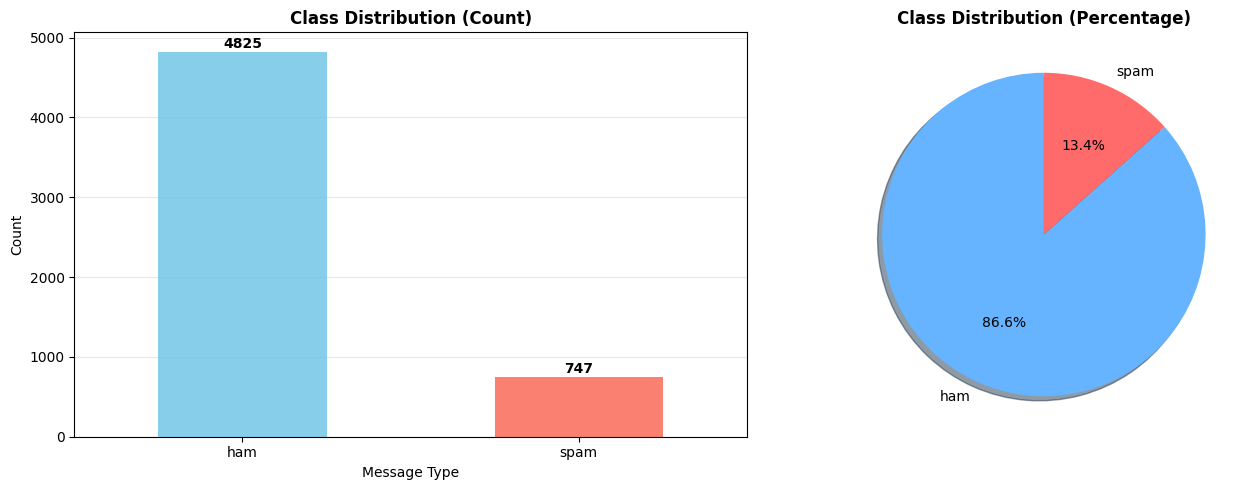

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.datasets import fetch_20newsgroups

# Load the Dataset Downloaded from Kaggle
# Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download
file_path = os.path.join("resources", "datasets", "spam.csv")

df = pd.read_csv(file_path, encoding='latin-1')

# Clean the data (Keep only first two columns)
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})

print(f"\nDataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Data Set Information
class_distribution_df = df['label'].value_counts()
total_num_of_data = len(df)
print(f'First 5 Rows of the Dataset')
display(df.head())

# Create Plot for Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
class_distribution_df.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Class Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Message Type')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(class_distribution_df): # Display the Class Count
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#66b3ff', '#ff6b6b']
axes[1].pie(class_distribution_df, 
           labels=class_distribution_df.index,
           autopct='%1.1f%%',
           colors=colors,
           startangle=90,
           shadow=True)
axes[1].set_title('Class Distribution (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### **2) Label the Data for Training and Testing**

Label the Data into Spam and Ham for the Training.

In [12]:
# Prepare the Data by Labelling them as Spam or Ham
df['labled_data'] = df['label'].map({'spam': 1, 'ham': 0}) # Convert Text Data into Numerical Values

x_data = df['text'] # Input Data: The Text messages
y_data = df['labled_data'] # After map => [spam, ham, spam, ham] => [1, 0, 1, 0]

# Split the Dataset into Training and Test Data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_data, y_data, test_size = 0.2, random_state = 42, stratify = y_data)

print(f'Training Dataset: {len(x_train)} (80%)')
print(f'Test Dataset: {len(x_test)} (20%)')

Training Dataset: 4457 (80%)
Test Dataset: 1115 (20%)


#### **3) Vectorization - Convert Text Data into Numerical Features**

**Text Vectorization:** Computers can not understand words, hence the words are represented in a numerical form.

"Win a free iPhone!"  is converted to [1, 1, 0, 1, 0, ...]  

**Step 1: Build Vocabulary**

```python
# Training messages:
"Win free prize"
"Free money now"
"See you tomorrow"

# Vocabulary (unique words):
['win', 'free', 'prize', 'money', 'now', 'see', 'you', 'tomorrow']
#  0      1       2        3       4      5     6       7
```

<br>

**Step 2: Count How Many Times Each Word Appears**

```python
Message: "Win free prize"
         ↓
         win  free  prize  money  now  see  you  tomorrow
Vector: [ 1    1     1      0     0    0    0      0    ]

Message: "Free money now"
         ↓
         win  free  prize  money  now  see  you  tomorrow
Vector: [ 0    1     0      1     1    0    0      0    ]

Message: "See you tomorrow"
         ↓
         win  free  prize  money  now  see  you  tomorrow
Vector: [ 0    0     0      0     0    1    1      1    ]
```

<br>

**Example with Spam Data**

```python
# Original text messages:
x_train = [
    "Congratulations! You won a free iPhone",
    "Hey, are we meeting tomorrow?",
    "URGENT! Click here now!"
]

# After Text Vectorization
# Vocabulary: ['congratulations', 'won', 'free', 'iphone', 'hey', 'meeting', 
#              'tomorrow', 'urgent', 'click', 'here', 'now']

x_train_vec = [
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # "Congratulations! You won a free iPhone"
    [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],  # "Hey, are we meeting tomorrow?
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],  # "URGENT! Click here now!"
]
```

In [13]:
text_vectorization = sklearn.feature_extraction.text.CountVectorizer(stop_words='english', max_features=3000)
x_train_vector = text_vectorization.fit_transform(x_train)
x_test_vector = text_vectorization.transform(x_test)

print(f"\nFeature Matrix Shape: {x_train_vector.shape}")
print(f"Number of unique words (Features): {len(text_vectorization.get_feature_names_out())}")



Feature Matrix Shape: (4457, 3000)
Number of unique words (Features): 3000


#### **4) Train the Model (Multinomial Naive Bayes)**

In [14]:
# Train Multinomial Naive Bayes
naive_bayes_classifier = sklearn.naive_bayes.MultinomialNB()
naive_bayes_classifier.fit(x_train_vector, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


#### **5) Test the Model with the Test Dataset**

In [15]:
y_predictions = naive_bayes_classifier.predict(x_test_vector)

#### **6) Evaluate the Performance & Confusion Matrix of the Model**

In [16]:
# Evaluate the Performance of the Model
model_accuracy = sklearn.metrics.accuracy_score(y_test, y_predictions)
model_performance_report = sklearn.metrics.classification_report(y_test, y_predictions, target_names=['Ham', 'Spam'], output_dict=True)
model_performance_report_df = pd.DataFrame(model_performance_report).transpose()

print(f"\nModel Accuracy: {model_accuracy*100:.2f}%")
print("\nClassification Report:")
display(model_performance_report_df)

# Generate the Confusion Matrix and Visualized it
model_CM = sklearn.metrics.confusion_matrix(y_test, y_predictions, )
model_CM_df = pd.DataFrame(model_CM, index = ['Actual Ham', 'Actual Spam'], columns = ['Predicted Ham','Predicted Spam'])

print("\nConfusion Matrix:")
display(model_CM_df)



Model Accuracy: 98.30%

Classification Report:


,precision,recall,f1-score,support
Ham,0.986639,0.993789,0.990201,966.00000
Spam,0.957746,0.912752,0.934708,149.00000
accuracy,0.982960,0.982960,0.982960,0.98296
macro avg,0.972193,0.953270,0.962455,1115.00000
weighted avg,0.982778,0.982960,0.982785,1115.00000



Confusion Matrix:


,Predicted Ham,Predicted Spam
Actual Ham,960,6
Actual Spam,13,136


#### **7) Test the Model with Custom Messages**

In [20]:
# Function to Call the Model to Test Custom Messages
def predict_message(message):
   """
      Uses the Trained Multinomial Naive Bayes Model to Predict the Probability of the message being a Spam
      Args:
         message(String): The Input Message to Classify
      Returns:
         Numerical Prediction of the Message being a Spam
   """

   # Vectorize Input Message
   message_vector = text_vectorization.transform([message])

   # Use the Model to Make the Prediction and Probability
   prediction = naive_bayes_classifier.predict(message_vector)[0]
   probability = naive_bayes_classifier.predict_proba(message_vector)[0]

   label = 'Spam' if prediction == 1 else 'Ham'
   confidence = probability[prediction] * 100

   print(f"\nInput Message: '{message}'")
   print(f"Prediction: {label}")
   print(f"Confidence: {confidence: .2f} %")
   print(f"Probabilities - Ham: {probability[0]*100:.2f}%, Spam: {probability[1]*100:.2f}%")

print(f"Test the Model with Custom Messages:")
predict_message("Congratulations! You've won a free iPhone. Click here to claim now!")
predict_message("Hey, are we still meeting for coffee tomorrow?")
predict_message("URGENT: Your account will be closed. Verify now!")
predict_message("Can you pick up milk on your way home?")



Test the Model with Custom Messages:

Input Message: 'Congratulations! You've won a free iPhone. Click here to claim now!'
Prediction: Spam
Confidence:  100.00 %
Probabilities - Ham: 0.00%, Spam: 100.00%

Input Message: 'Hey, are we still meeting for coffee tomorrow?'
Prediction: Ham
Confidence:  99.99 %
Probabilities - Ham: 99.99%, Spam: 0.01%

Input Message: 'URGENT: Your account will be closed. Verify now!'
Prediction: Spam
Confidence:  96.83 %
Probabilities - Ham: 3.17%, Spam: 96.83%

Input Message: 'Can you pick up milk on your way home?'
Prediction: Ham
Confidence:  100.00 %
Probabilities - Ham: 100.00%, Spam: 0.00%


---


### **Python Exercise: Naive Bayes (Gaussian - Machine Predictive Maintenance Classification)**

Gaussian Naive Bayes is ideal for predictive maintenance using continuous sensor readings like temperature, vibration levels, pressure, or RPM. For example, it learns that failing machines typically have vibration levels around 85±10 Hz and temperature around 95±5°C, while healthy machines show 45±8 Hz and 70±3°C, then classifies whether a machine needs maintenance based on where its current sensor readings fall within these distributions.

The Example Below shows the Machine Predictive Maintenance Classification Dataset from Kaggle.

#### **1) Dataset Information**

##### **Machine Predictive Maintenance Classification Dataset**

A synthetic dataset reflecting real industrial predictive maintenance scenarios with **10,000 data points** and **14 features**.

| Feature | Description | Details |
|---------|-------------|---------|
| **UID** | Unique identifier | Range: 1 to 10,000 |
| **Product ID** | Product quality variant + serial number | L (Low - 50%), M (Medium - 30%), H (High - 20%) |
| **Air Temperature [K]** | Ambient temperature | Random walk, σ = 2K, centered at 300K |
| **Process Temperature [K]** | Operating temperature | Air temp + 10K, σ = 1K |
| **Rotational Speed [rpm]** | Shaft rotation speed | Calculated from 2860W power with noise |
| **Torque [Nm]** | Applied torque | Normal distribution: μ = 40Nm, σ = 10Nm (no negatives) |
| **Tool Wear [min]** | Cumulative tool usage | H/M/L variants add 5/3/2 minutes respectively |

##### **Targets**

| Target | Description |
|--------|-------------|
| **Target** | Binary: Failure or Not |
| **Failure Type** | Categorical: Type of failure |

**Critical Warning**: Both are targets so **do not use one as a feature** to avoid data leakage!

**Data leakage** occurs when information from outside the training dataset (or from the target itself) is used to create the model, artificially inflating performance. The model appears highly accurate during training/testing but fails in real-world deployment because the leaked information isn't available when making actual predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sklearn.preprocessing     # Preparing & Transforming Data before Training
import sklearn.model_selection   # Splitting & Validating Dataset
import sklearn.naive_bayes       # Naive Bayes Classification Algorithm
import sklearn.metrics           # Evaluating Model Metrics

# Load the Dataset Downloaded from Kaggle: Machine Predictive Maintenance Classification
# Link: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification
file_path = os.path.join("resources","datasets","predictive_maintenance.csv")

# Create Data Frame to Store the CSV Data
pred_maint_df = pd.read_csv(file_path)

# Print the Dataset Information
print(f"Dataset Shape: {pred_maint_df.shape}")
print(f"Columns: {pred_maint_df.columns.to_list()}")
print(f"\nFirst 5 Rows of Data:")
print(pred_maint_df.head())


Dataset Shape: (10000, 10)
Columns: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']
